0 STATION
1 NAME
2 DATE
3 PRCP
4 TMAX
5 TMIN
6 TOBS




<IPython.core.display.Javascript object>


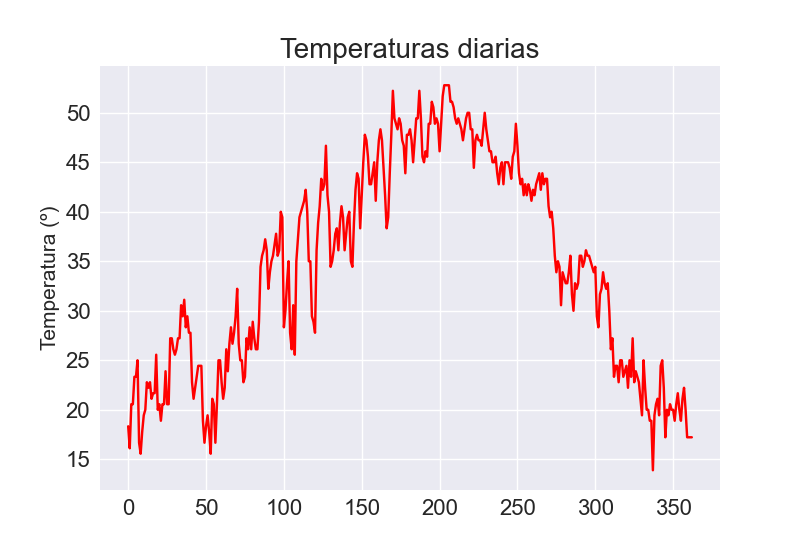

In [31]:
import csv
import matplotlib.pyplot as plt
%matplotlib notebook

def fareh_celsius(farenheit):
    return (farenheit-32)*5/9

nombre_archivo = 'death_valley_2018_simple.csv'

with open(nombre_archivo) as f:
    datos = csv.reader(f)
    fila_datos = next(datos)
   
    for indice, cabecera in enumerate(fila_datos):
        print(indice, cabecera)
    print('\n')
    
    # Nos interesa los campos 2 de fecha y 4 de maximas

    maximas = []
    for fila in datos:
        max = round(fareh_celsius(int(fila[4])), 2)
        maximas.append(max)
        
    # Traza las temperaturas máximas
    plt.style.use('seaborn')
    fig, ax = plt.subplots()
    ax.plot(maximas, c='red')
    
    # Dar formato al trazado
    plt.title("Temperaturas diarias", fontsize=20)
    plt.xlabel("", fontsize=15)
    plt.ylabel("Temperatura (º)", fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    plt.show()


## El módulo datetime

Para añadir las fechas al gráfico necesitamos convertir las cadenas en un objeto que represente la fecha. Esto lo conseguimos con el módulo datetime, concretamente con el método strptime(). Para ver como funciona podemos ejecutar el siguiente código

In [4]:
from datetime import datetime
fecha = datetime.strptime('2021-12-14', '%Y-%m-%d')
print(fecha)

2021-12-14 00:00:00


El primer argumento es la feche en formato cadena con la que queremos trabajar y el segundo argumento dice a Python que formato tiene que tener la fecha. Python interpreta '%Y-' significa que la parte de la cadena antes del guion es un año con cuatro dígitos, '%m-' significa que la cadena despues del segundo guion es un mes y '%d' significa que la última parte de la cadena es el día.

El método strptime() puede tomar varios argumentos para determinar cómo interpretar la fecha:

%A nombre del dia de la semana como, Monday
%B nombre del mes, como January
%m Mes como número (01 al 12)
%d Dia del mes com número (01 al 31)
%Y Año de cuatro dígitos como 2021
%y año de dos digitos como 21
%H Hora en formato 24 horas (00 a 23)
%I Hora en formato de 12 horas (01 al 12)
%p am o pm
%M Minutos de (00 a 59)
%S Segundos de (00 a 61)

# Trazar fechas

Ahora podemos añadir las fechas al gráfico. Creamos dos listas vacias para guardar las fechas y las temperaturas máximas del archivo. Luego convertimos los datos que contienen información de la fecha (2). Pasamos esa información a plot (3) y en (4) la llamada a fig.autofmt_xdate() dibuja las etiquetas de las fechas diagonalmente para evitar que se solapen.


0 STATION
1 NAME
2 DATE
3 PRCP
4 TMAX
5 TMIN
6 TOBS




<IPython.core.display.Javascript object>


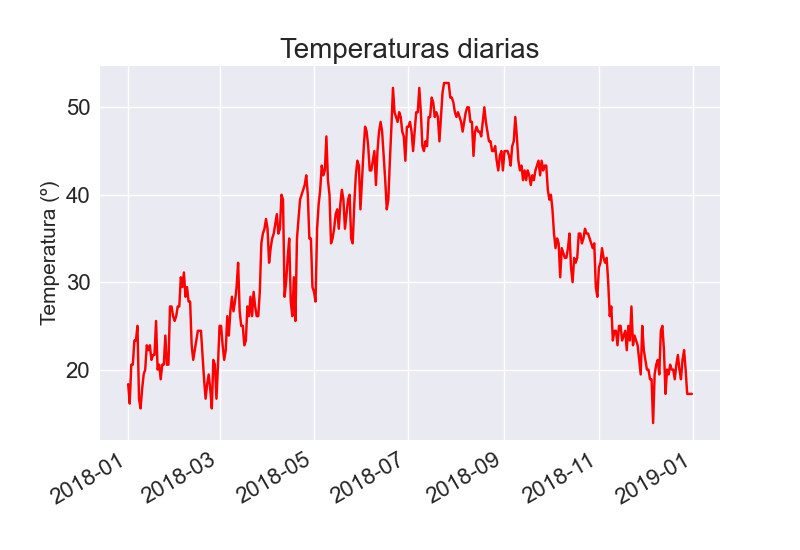

In [7]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

def fareh_celsius(farenheit):
    return (farenheit-32)*5/9

nombre_archivo = 'death_valley_2018_simple.csv'

with open(nombre_archivo) as f:
    datos = csv.reader(f)
    fila_datos = next(datos)
   
    for indice, cabecera in enumerate(fila_datos):
        print(indice, cabecera)
    print('\n')
    
    # Nos interesa los campos 2 de fecha y 4 de maximas
    # Obtenemos fechas y temperaturas máximas del archivo.

    maximas = []
    fechas = []
    
    for fila in datos:
        max = round(fareh_celsius(int(fila[4])), 2)
        maximas.append(max)
        fecha = datetime.strptime(fila[2], '%Y-%m-%d') # (2)
        fechas.append(fecha)
        
    # Traza las temperaturas máximas
    plt.style.use('seaborn')
    fig, ax = plt.subplots()
    ax.plot(fechas, maximas, c='red') # (3)
    
    # Dar formato al trazado
    plt.title("Temperaturas diarias", fontsize=20)
    plt.xlabel("", fontsize=15)
    fig.autofmt_xdate() # (4)
    plt.ylabel("Temperatura (º)", fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    plt.show()


 # trazar una segunda serie de datos.  

También podemos incluir una segunda serie de dato, por ejemplo las temperaturas mínimas. Es tan sencillo como añadir un nuevo ax.plot() lógicamente con el mismo eje x de las fechas e y de las temperaturas minimas.

0 STATION
1 NAME
2 DATE
3 PRCP
4 TMAX
5 TMIN
6 TOBS




<IPython.core.display.Javascript object>


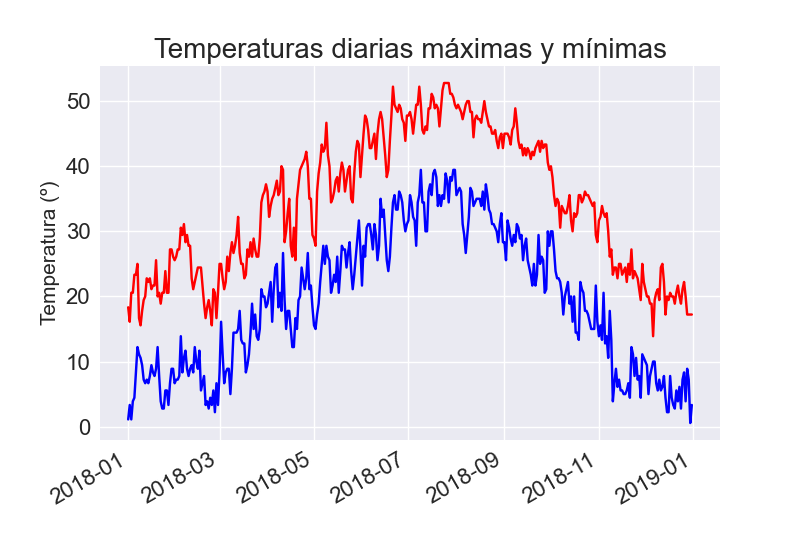

In [4]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

def fareh_celsius(farenheit):
    return (farenheit-32)*5/9

nombre_archivo = 'death_valley_2018_simple.csv'

with open(nombre_archivo) as f:
    datos = csv.reader(f)
    fila_datos = next(datos)
   
    for indice, cabecera in enumerate(fila_datos):
        print(indice, cabecera)
    print('\n')
    
    # Nos interesa los campos 2 de fecha, 4 de maximas y 5 de minimas
    # Obtenemos fechas y temperaturas máximas y minimas del archivo.

    maximas, minimas, fechas = [], [], []
    
    for fila in datos:
        max = round(fareh_celsius(int(fila[4])), 2)
        maximas.append(max)
        fecha = datetime.strptime(fila[2], '%Y-%m-%d') # (2)
        fechas.append(fecha)
        min = round(fareh_celsius(int(fila[5])), 2)
        minimas.append(min)
        
    # Traza las temperaturas máximas y mínimas
    plt.style.use('seaborn')
    fig, ax = plt.subplots()
    ax.plot(fechas, maximas, c='red') # (3)
    ax.plot(fechas, minimas, c='blue')
    
    # Dar formato al trazado
    plt.title("Temperaturas diarias máximas y mínimas", fontsize=20)
    plt.xlabel("", fontsize=15)
    fig.autofmt_xdate() # (4)
    plt.ylabel("Temperatura (º)", fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    plt.show()


## Sombrear un área del gráfico

Vamos a sombrear el rango entre la máxima y la mínima de cada dia. Para ello, usaremos el método fill_between() que toma una serie de valores x y dos series de valores y para rellenar el espacio entre los dos valores de la serie y.

0 STATION
1 NAME
2 DATE
3 PRCP
4 TMAX
5 TMIN
6 TOBS




<IPython.core.display.Javascript object>


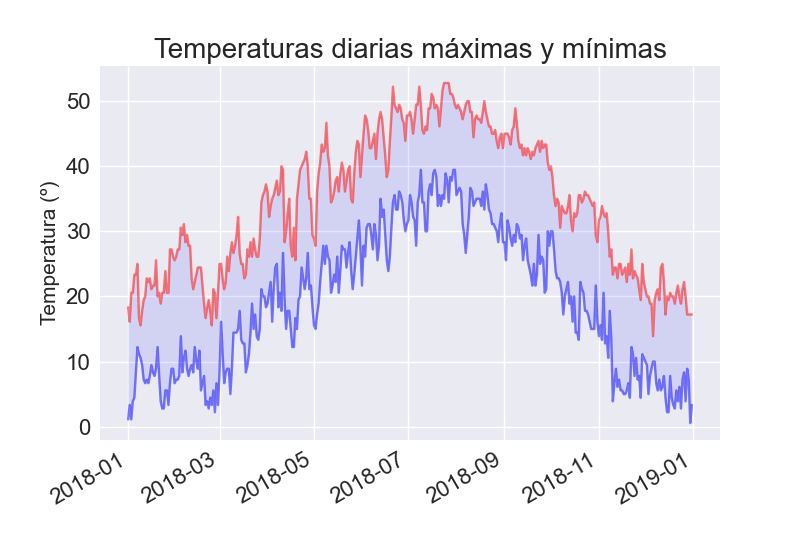

In [6]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

def fareh_celsius(farenheit):
    return (farenheit-32)*5/9

nombre_archivo = 'death_valley_2018_simple.csv'

with open(nombre_archivo) as f:
    datos = csv.reader(f)
    fila_datos = next(datos)
   
    for indice, cabecera in enumerate(fila_datos):
        print(indice, cabecera)
    print('\n')
    
    # Nos interesa los campos 2 de fecha, 4 de maximas y 5 de minimas
    # Obtenemos fechas y temperaturas máximas y minimas del archivo.

    maximas, minimas, fechas = [], [], []
    
    for fila in datos:
        max = round(fareh_celsius(int(fila[4])), 2)
        maximas.append(max)
        fecha = datetime.strptime(fila[2], '%Y-%m-%d') 
        fechas.append(fecha)
        min = round(fareh_celsius(int(fila[5])), 2)
        minimas.append(min)
        
    # Traza las temperaturas máximas y mínimas
    plt.style.use('seaborn')
    fig, ax = plt.subplots()
    ax.plot(fechas, maximas, c='red', alpha=0.5) #(1)
    ax.plot(fechas, minimas, c='blue', alpha=0.5)
    plt.fill_between(fechas, maximas, minimas, facecolor='blue', alpha=0.1)
    
    # Dar formato al trazado
    plt.title("Temperaturas diarias máximas y mínimas", fontsize=20)
    plt.xlabel("", fontsize=15)
    fig.autofmt_xdate() # (4)
    plt.ylabel("Temperatura (º)", fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    plt.show()


El argumento alpha controla la transparencia del color. Un valor alpha de 0 es completamente transparente, y 1 (el predeterminado es totalmente opaco) Al configurar alpha como 0.5 hacemos que las línea roja y azul sean más claras. El argumento facecolor dtermina el color de la región sombreada.